In [351]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

In [352]:
%load_ext autoreload
%autoreload 2
from task7 import (left_rectangle_method,
                   mid_rectangle_method,
                   trapezoidal_method,
                   simpson_method,
                   newton_cotes_3point,
                   gauss_3point,
                   )


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [353]:
a = 1.1
b = 2.5
alpha = 2 / 5
beta = 0
n = 100

In [354]:
def f(x):
    """ Пользовательская функция. """
    return 0.5 * np.cos(2 * x) * np.exp(2 * x / 5) + 2.4 * np.sin(1.5 * x) * np.exp(-6 * x) + 6 * x


In [355]:
def F(x):
    """ Пользовательская функция. """
    return f(x) / (x - a)**alpha


# Вывод

In [356]:
print(f"Интервал: [{a}, {b}]\nКол-во разбиений: {n}\n")

print(f"Точное значение: {scipy.integrate.quad(f, a, b)[0]}\n")
print(f"Метод левых прямоугольников: {left_rectangle_method(f, a, b, n)}")
print(f"Метод средних прямоугольников: {mid_rectangle_method(f, a, b, n)}")
print(f"Метод трапеции: {trapezoidal_method(f, a, b, n)}")
print(f"Метод Симпсона: {simpson_method(f, a, b, n)}\n")

print(f"Точное значение: {scipy.integrate.quad(F, a, b)[0]}\n")
print(f"Метод Ньютона-Котса: {newton_cotes_3point(f, a, b, n, alpha)}")
print(f"Метод Гаусса 3-точечный: {gauss_3point(f, a, b, n, alpha)}")

Интервал: [1.1, 2.5]
Кол-во разбиений: 100

Точное значение: 14.273140902433548

Метод левых прямоугольников: 14.208535644088457
Метод средних прямоугольников: 14.273106447533289
Метод трапеции: 14.2732098115549
Метод Симпсона: 14.273140898811029

Точное значение: 18.60294785732018

Метод Ньютона-Котса: 18.41504812337024
Метод Гаусса 3-точечный: 18.430735295591496


# График Абсолютной погрешности

In [357]:
# Диапазон значений n
n_values = np.arange(2, 400, 5)

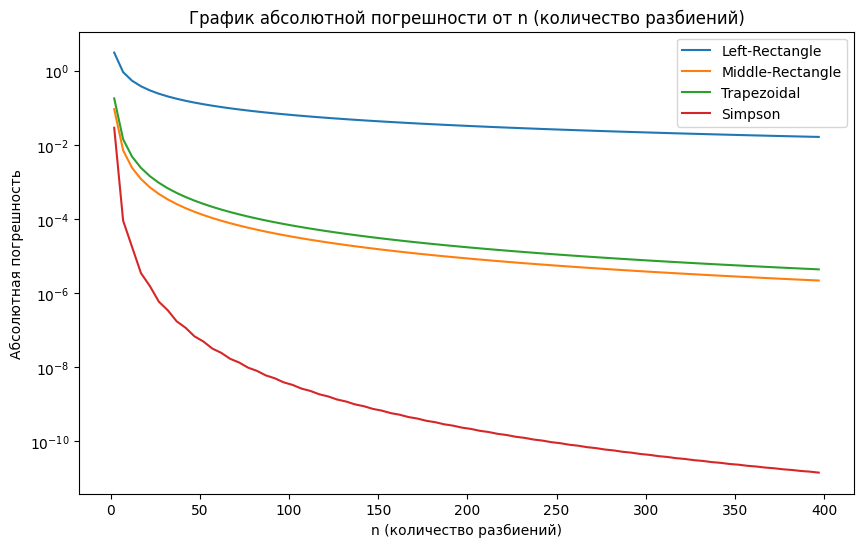

In [358]:
# Истинное значение интеграла
true_value_1, true_value_err_1 = scipy.integrate.quad(f, a, b) 

# Список методов
methods = {
    "Left-Rectangle": left_rectangle_method,
    "Middle-Rectangle": mid_rectangle_method,
    "Trapezoidal": trapezoidal_method,
    "Simpson": simpson_method,
}

# Для каждого метода и значения n вычислите абсолютную погрешность
errors = {method: [] for method in methods}

for n in n_values:
    for method_name, method in methods.items():
        approx_value = method(f, a, b, n)
        error = abs(approx_value - true_value_1)
        errors[method_name].append(error)

# Построение графиков
plt.figure(figsize=(10, 6))
for method_name, error_values in errors.items():
    plt.plot(n_values, error_values, label=method_name)

plt.xlabel("n (количество разбиений)")
plt.ylabel("Абсолютная погрешность")
plt.yscale("log")  # Логарифмическая шкала для более наглядного отображения погрешностей
plt.legend()
plt.title("График абсолютной погрешности от n (количество разбиений)")
plt.show()


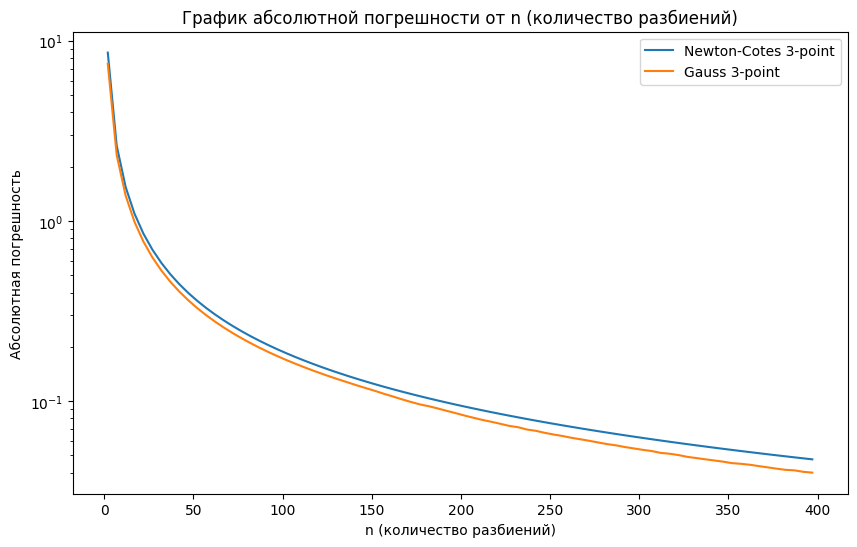

In [359]:
# Истинное значение интеграла
true_value_2, true_value_err_2 = scipy.integrate.quad(F, a, b) 

# Список методов
methods = {
    "Newton-Cotes 3-point": newton_cotes_3point,
    "Gauss 3-point": gauss_3point
}

# Для каждого метода и значения n вычислите абсолютную погрешность
errors = {method: [] for method in methods}

for n in n_values:
    for method_name, method in methods.items():
        approx_value = method(f, a, b, n, alpha)
        error = abs(approx_value - true_value_2)
        errors[method_name].append(error)

# Построение графиков
plt.figure(figsize=(10, 6))
for method_name, error_values in errors.items():
    plt.plot(n_values, error_values, label=method_name)

plt.xlabel("n (количество разбиений)")
plt.ylabel("Абсолютная погрешность")
plt.yscale("log")  # Логарифмическая шкала для более наглядного отображения погрешностей
plt.legend()
plt.title("График абсолютной погрешности от n (количество разбиений)")
plt.show()
